In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Load data

In [4]:
df = pd.read_csv('drive/MyDrive/dpr-qa-report.csv')
df.head(5)

,Unnamed: 0,QA model,Dataset,embed_title,context_window_size,max_seq_len,doc_stride,max_seq_len_passage,max_seq_len_query,Retriever top-k,QA top-k,Rouge-1,Rouge-2,Rouge-l,Bleu,Answers percent in retrieved documents,VRAM,document embedding time,inference time
0,0,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,150,256,100,256,64,3,3,0.251098,0.159368,0.243856,0.079877,0.147059,0,584.795759,2.969653
1,1,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,150,256,100,256,64,3,5,0.285494,0.187559,0.275389,0.056820,0.147059,0,584.795759,2.666598
2,2,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,150,256,100,256,64,3,7,0.282064,0.183417,0.270337,0.049170,0.147059,0,584.795759,2.699238
3,3,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,150,256,100,256,64,5,3,0.282972,0.182300,0.263041,0.076722,0.147059,0,584.795759,3.913378
4,4,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,150,256,100,256,64,5,5,0.319277,0.215881,0.306076,0.050894,0.147059,0,584.795759,4.027034


In [5]:
df.shape

(864, 19)

In [6]:
df.columns

Index(['Unnamed: 0', 'QA model', 'Dataset', 'embed_title',
       'context_window_size', 'max_seq_len', 'doc_stride',
       'max_seq_len_passage', 'max_seq_len_query', 'Retriever top-k',
       'QA top-k', 'Rouge-1', 'Rouge-2', 'Rouge-l', 'Bleu',
       'Answers percent in retrieved documents', 'VRAM',
       'document embedding time', 'inference time'],
      dtype='object')

# QA model

In [7]:
model_names = df['QA model'].unique()
desired_columns = ['Rouge-1', 'Rouge-2', 'Rouge-l', 'Bleu', 'inference time']

metrics = []

for model_name in model_names:
    metric_average = list(df[df['QA model'] == model_name][desired_columns].mean().T)
    metrics.append(metric_average)

model_df = pd.DataFrame(metrics, columns=desired_columns, index=[model_name.split('/')[-1] for model_name in model_names])
model_df

,Rouge-1,Rouge-2,Rouge-l,Bleu,inference time
bert_basefi_qafi,0.253360,0.145985,0.236423,0.047067,3.671815
squeeze-bertfi_qafi,0.224677,0.104560,0.204286,0.045218,4.101577
albert-xlarge-v2-squad-v2,0.239947,0.116100,0.219739,0.046593,27.537974
roberta-base-squad2,0.259435,0.135912,0.240656,0.050626,3.766321
minilm-uncased-squad2,0.276726,0.159481,0.257236,0.043880,3.036557
albert_xxlargev1_squad2_512,0.266051,0.156074,0.247507,0.053353,51.324005


Text(0, 0.5, 'Metrics')

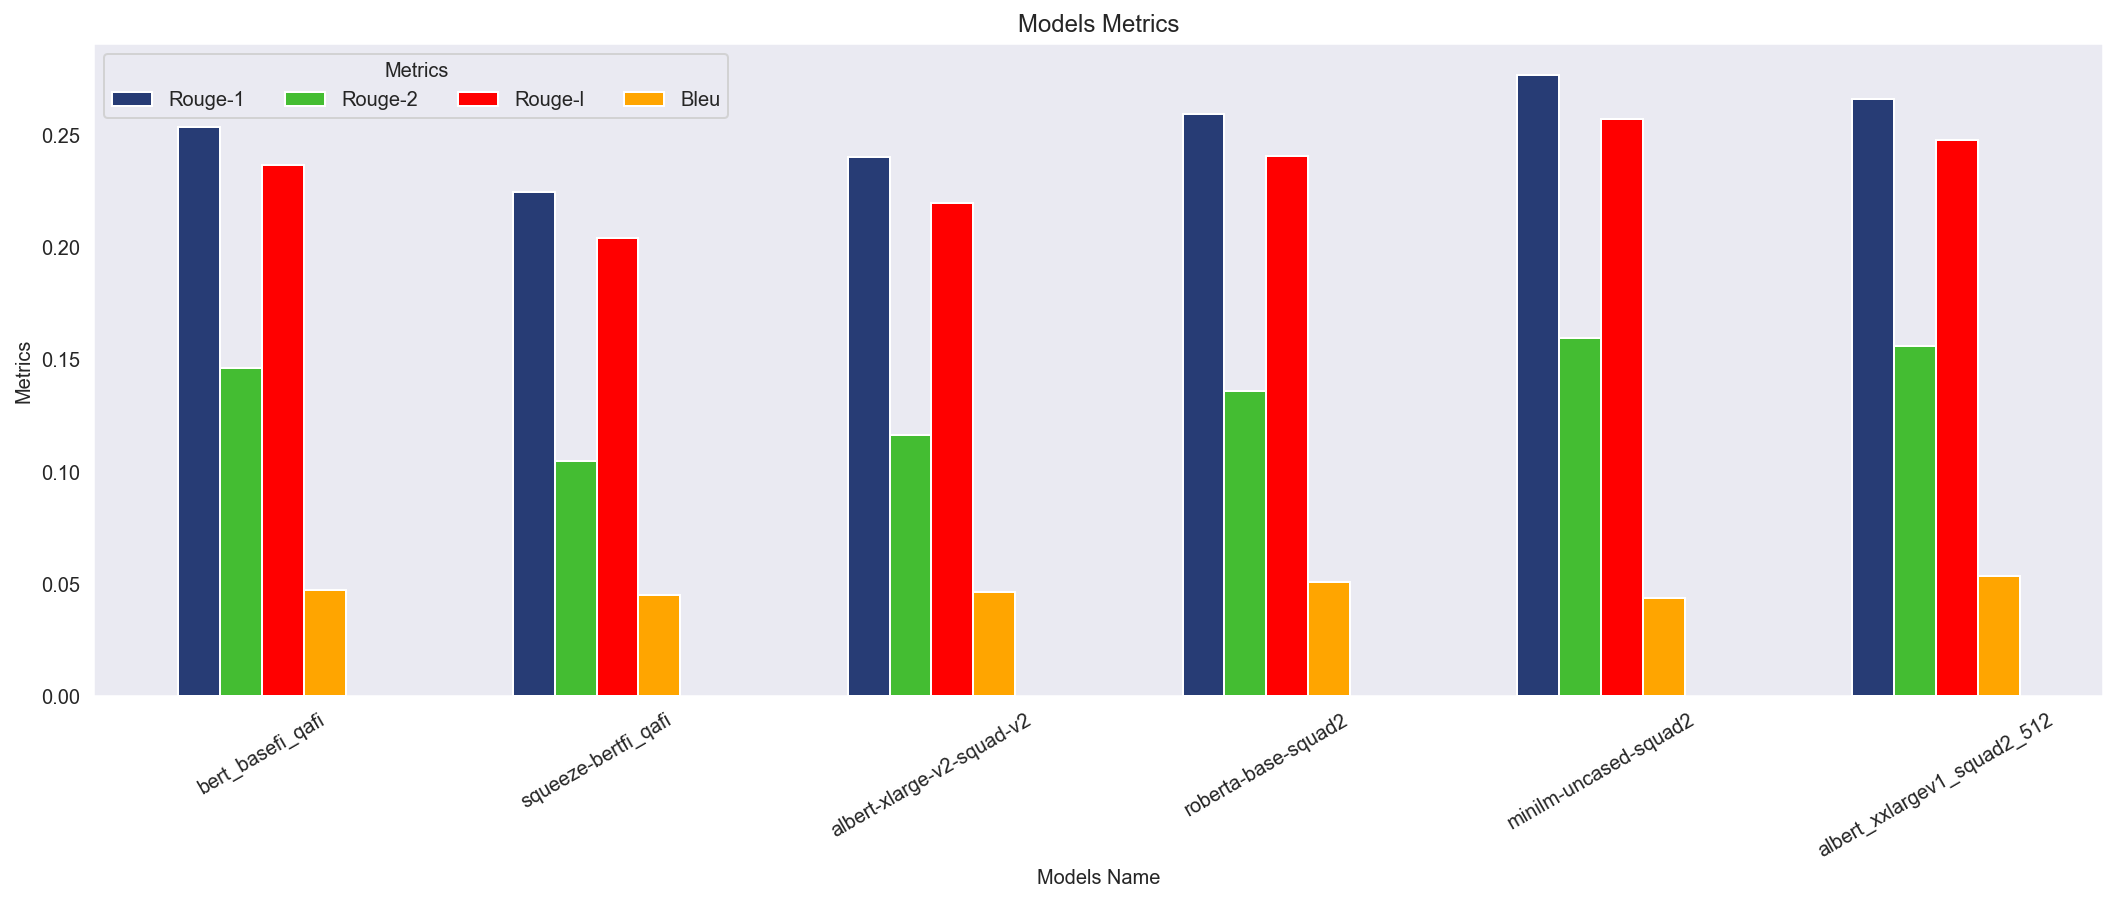

In [8]:
plt.rcParams["figure.figsize"] = [18, 6]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
model_df[desired_columns[:-1]].plot(kind="bar", 
                                    color=['#273c75', '#44bd32', 'red', 'orange']).legend(loc='upper left', ncol=4, title="Metrics")

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Models Metrics")
plt.xlabel("Models Name")
plt.ylabel("Metrics")

Text(0, 0.5, 'time(s)')

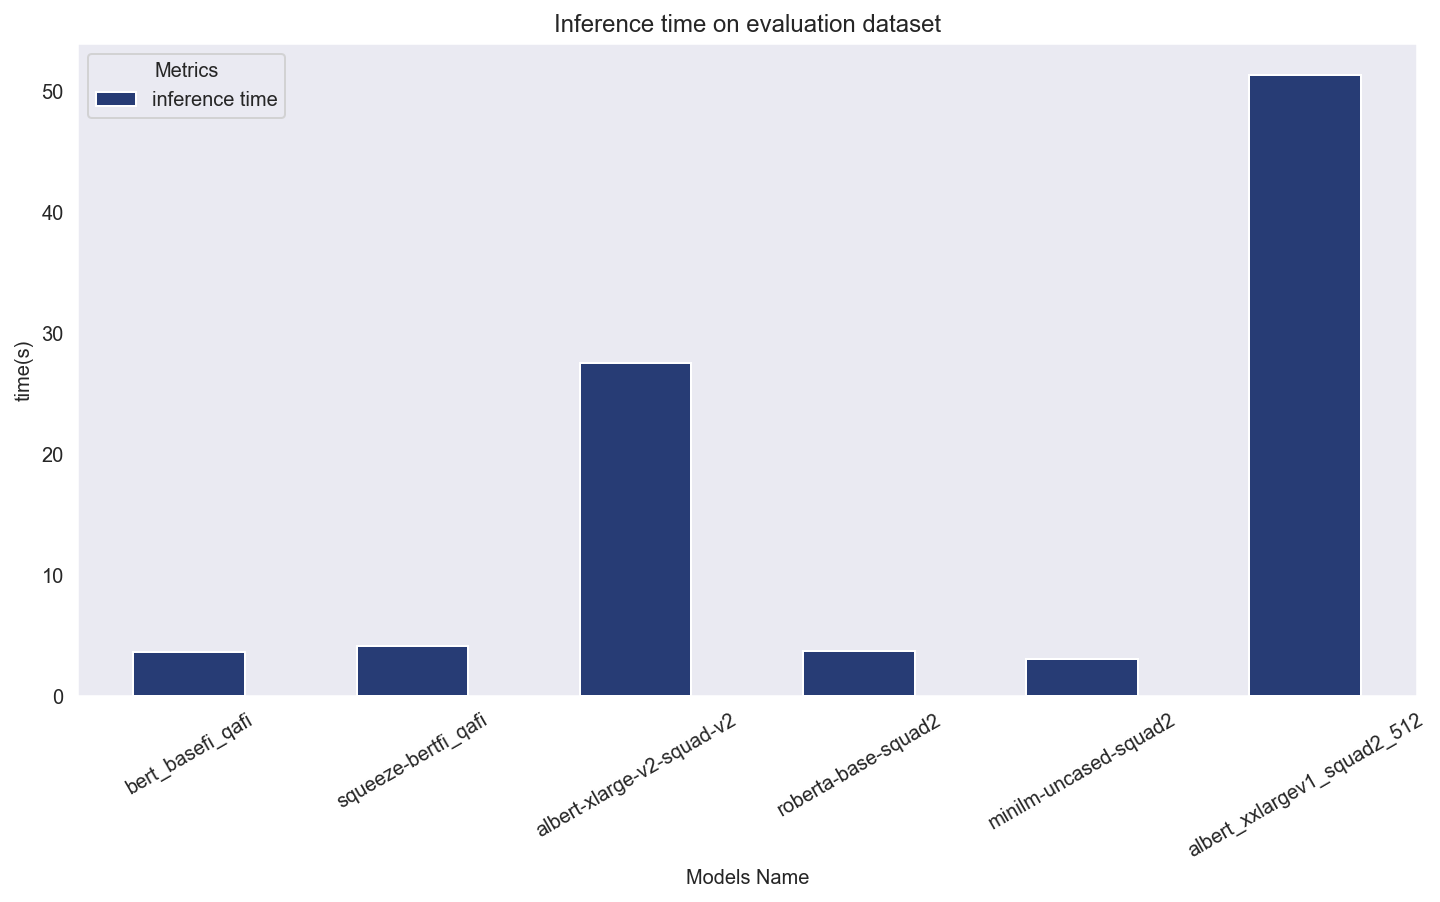

In [9]:
plt.rcParams["figure.figsize"] = [12, 6]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
model_df[desired_columns[-1]].plot(kind="bar", 
                                    color=['#273c75']).legend(loc='upper left', ncol=1, title="Metrics")

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Inference time on evaluation dataset")
plt.xlabel("Models Name")
plt.ylabel("time(s)")

# Context window size

In [10]:
window_sizes = df['context_window_size'].unique()
desired_columns = ['Rouge-1', 'Rouge-2', 'Rouge-l', 'Bleu', 'inference time']

metrics = []

for window_size in window_sizes:
    metric_average = list(df[df['context_window_size'] == window_size][desired_columns].mean().T)
    metrics.append(metric_average)

window_df = pd.DataFrame(metrics, columns=desired_columns, index=window_sizes)
window_df

,Rouge-1,Rouge-2,Rouge-l,Bleu,inference time
150,0.253366,0.136352,0.234308,0.04779,15.582996
175,0.253366,0.136352,0.234308,0.04779,15.563087


Text(0, 0.5, 'Metrics')

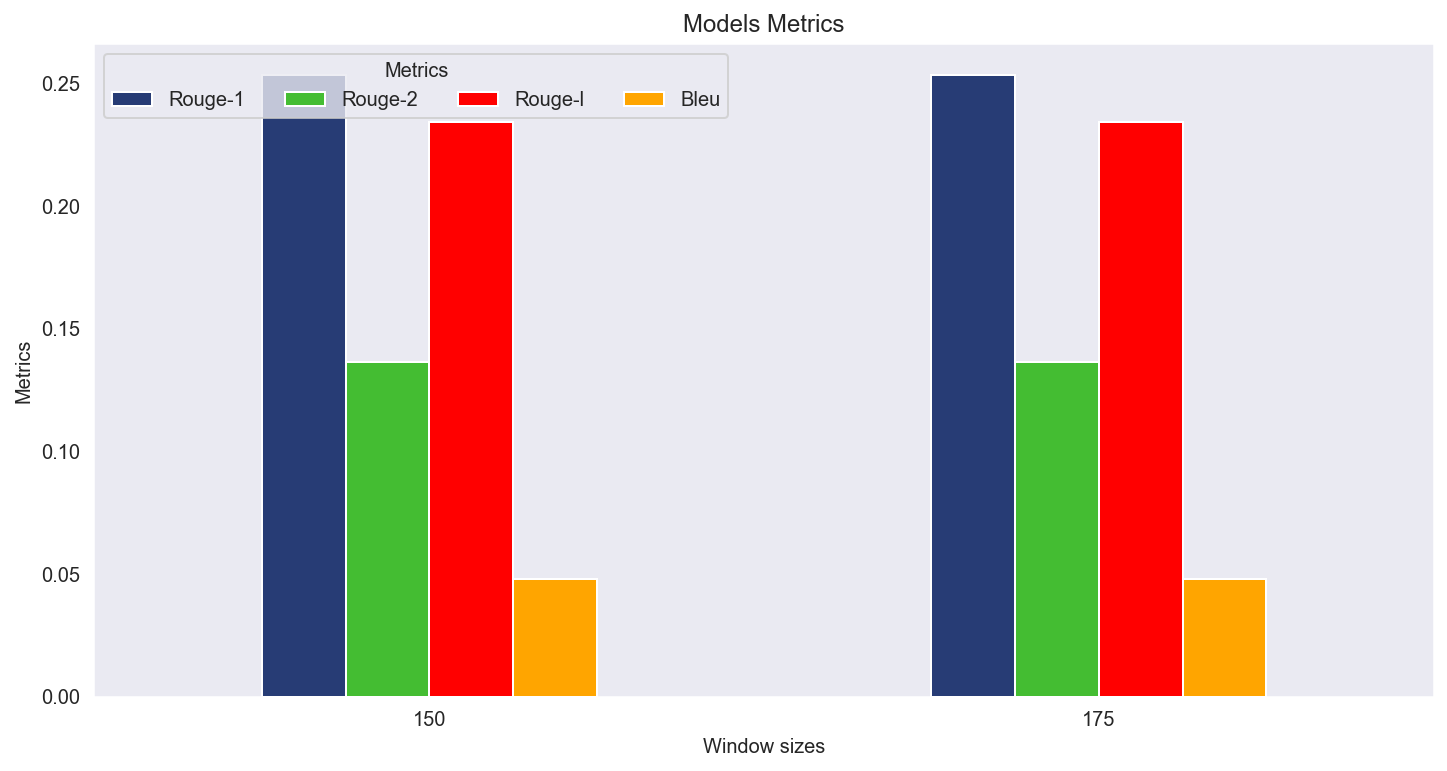

In [11]:
plt.rcParams["figure.figsize"] = [12, 6]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
window_df[desired_columns[:-1]].plot(kind="bar", 
                                    color=['#273c75', '#44bd32', 'red', 'orange']).legend(loc='upper left', ncol=4, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Models Metrics")
plt.xlabel("Window sizes")
plt.ylabel("Metrics")

Text(0, 0.5, 'time(s)')

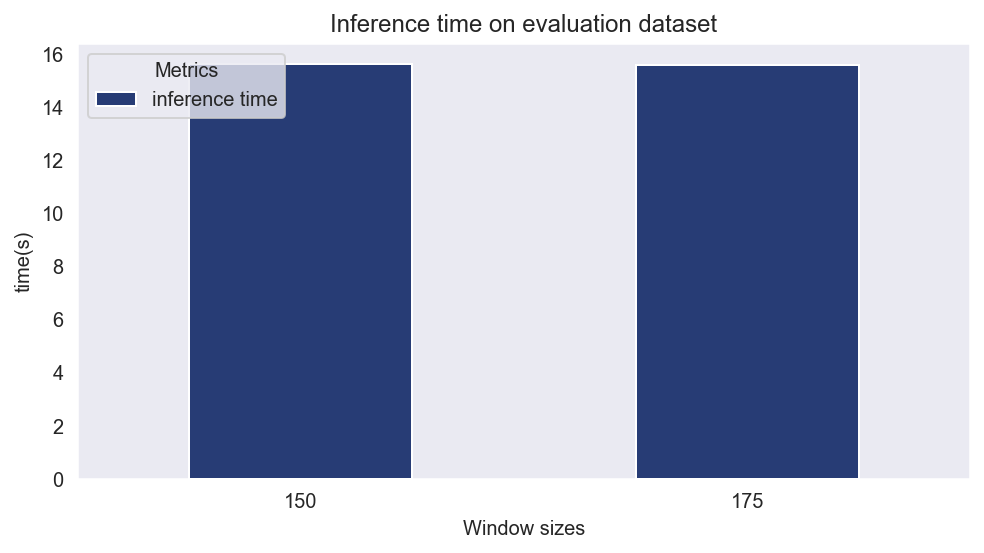

In [12]:
plt.rcParams["figure.figsize"] = [8, 4]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
window_df[desired_columns[-1]].plot(kind="bar", 
                                    color=['#273c75']).legend(loc='upper left', ncol=1, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Inference time on evaluation dataset")
plt.xlabel("Window sizes")
plt.ylabel("time(s)")

# Embed Title

In [13]:
embed_titles = df['embed_title'].unique()
desired_columns = ['Rouge-1', 'Rouge-2', 'Rouge-l', 'Bleu', 'inference time']

metrics = []

for embed_title in embed_titles:
    metric_average = list(df[df['embed_title'] == embed_title][desired_columns].mean().T)
    metrics.append(metric_average)

embed_df = pd.DataFrame(metrics, columns=desired_columns, index=embed_titles)
embed_df

,Rouge-1,Rouge-2,Rouge-l,Bleu,inference time
True,0.272734,0.160717,0.251616,0.048876,17.028617
False,0.233998,0.111987,0.216999,0.046703,14.117466


Text(0, 0.5, 'Metrics')

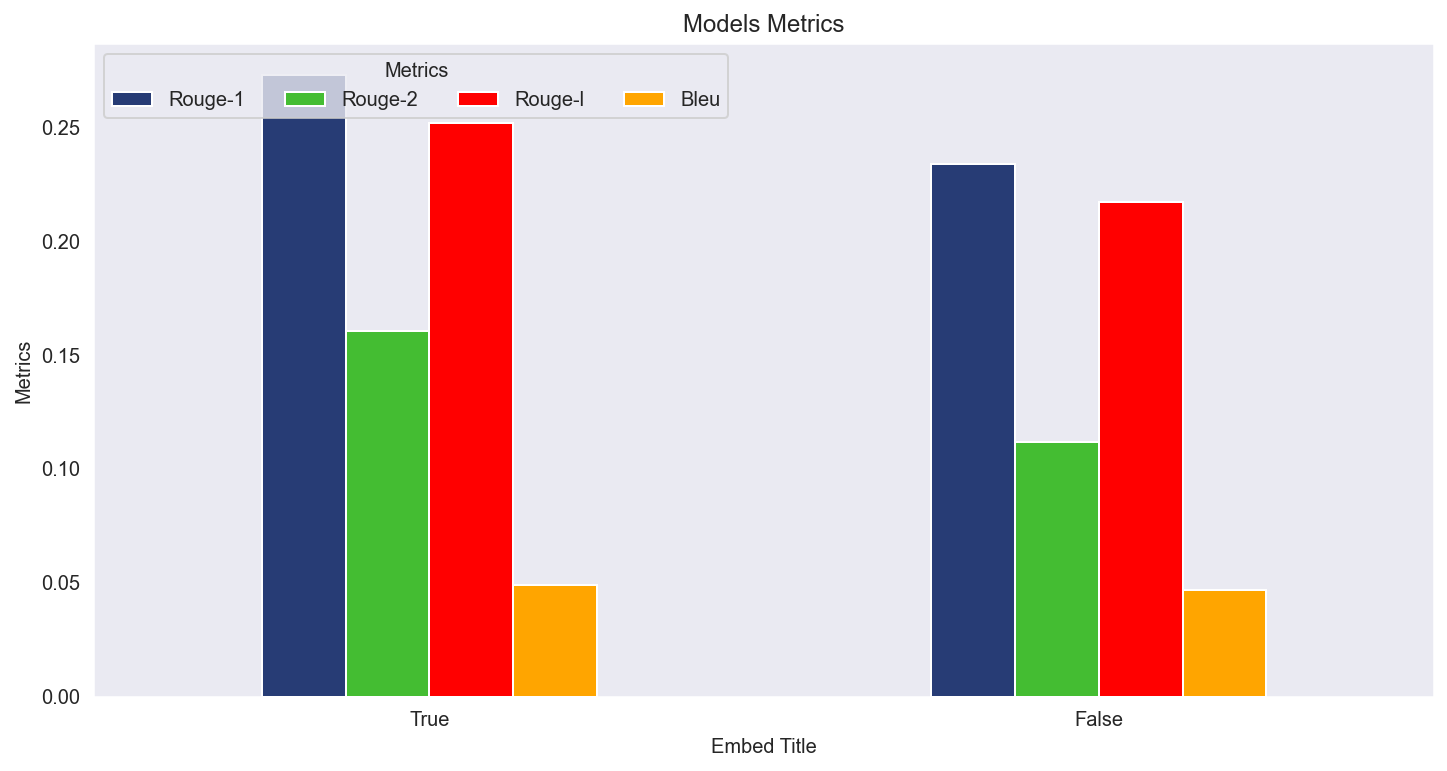

In [14]:
plt.rcParams["figure.figsize"] = [12, 6]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
embed_df[desired_columns[:-1]].plot(kind="bar", 
                                    color=['#273c75', '#44bd32', 'red', 'orange']).legend(loc='upper left', ncol=4, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Models Metrics")
plt.xlabel("Embed Title")
plt.ylabel("Metrics")

Text(0, 0.5, 'time(s)')

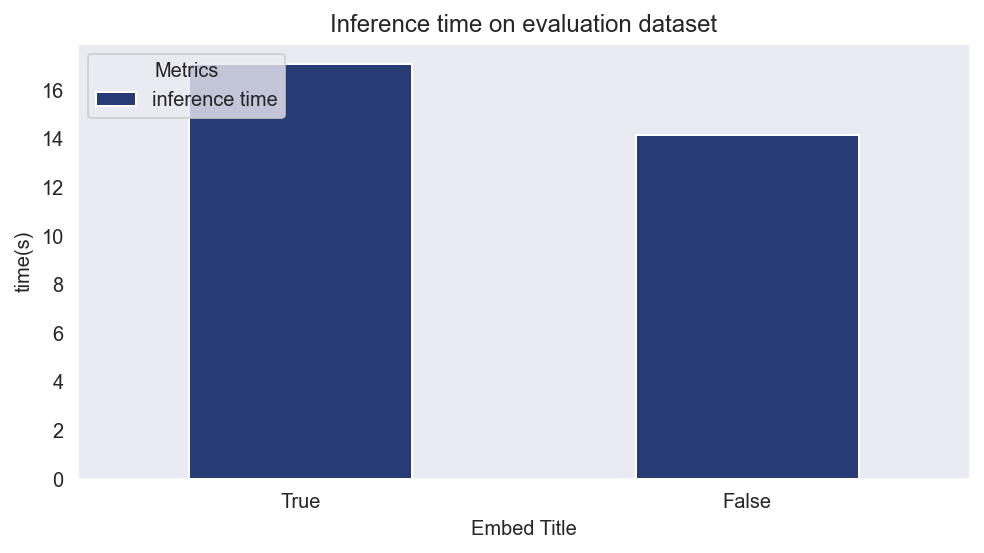

In [15]:
plt.rcParams["figure.figsize"] = [8, 4]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
embed_df[desired_columns[-1]].plot(kind="bar", 
                                    color=['#273c75']).legend(loc='upper left', ncol=1, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Inference time on evaluation dataset")
plt.xlabel("Embed Title")
plt.ylabel("time(s)")

# Document stride

In [16]:
doc_strides = df['doc_stride'].unique()
desired_columns = ['Rouge-1', 'Rouge-2', 'Rouge-l', 'Bleu', 'inference time']

metrics = []

for doc_stride in doc_strides:
    metric_average = list(df[df['doc_stride'] == doc_stride][desired_columns].mean().T)
    metrics.append(metric_average)

stride_df = pd.DataFrame(metrics, columns=desired_columns, index=doc_strides)
stride_df

,Rouge-1,Rouge-2,Rouge-l,Bleu,inference time
100,0.253107,0.136079,0.234036,0.047767,15.486869
128,0.253625,0.136625,0.234579,0.047812,15.659214


Text(0, 0.5, 'Metrics')

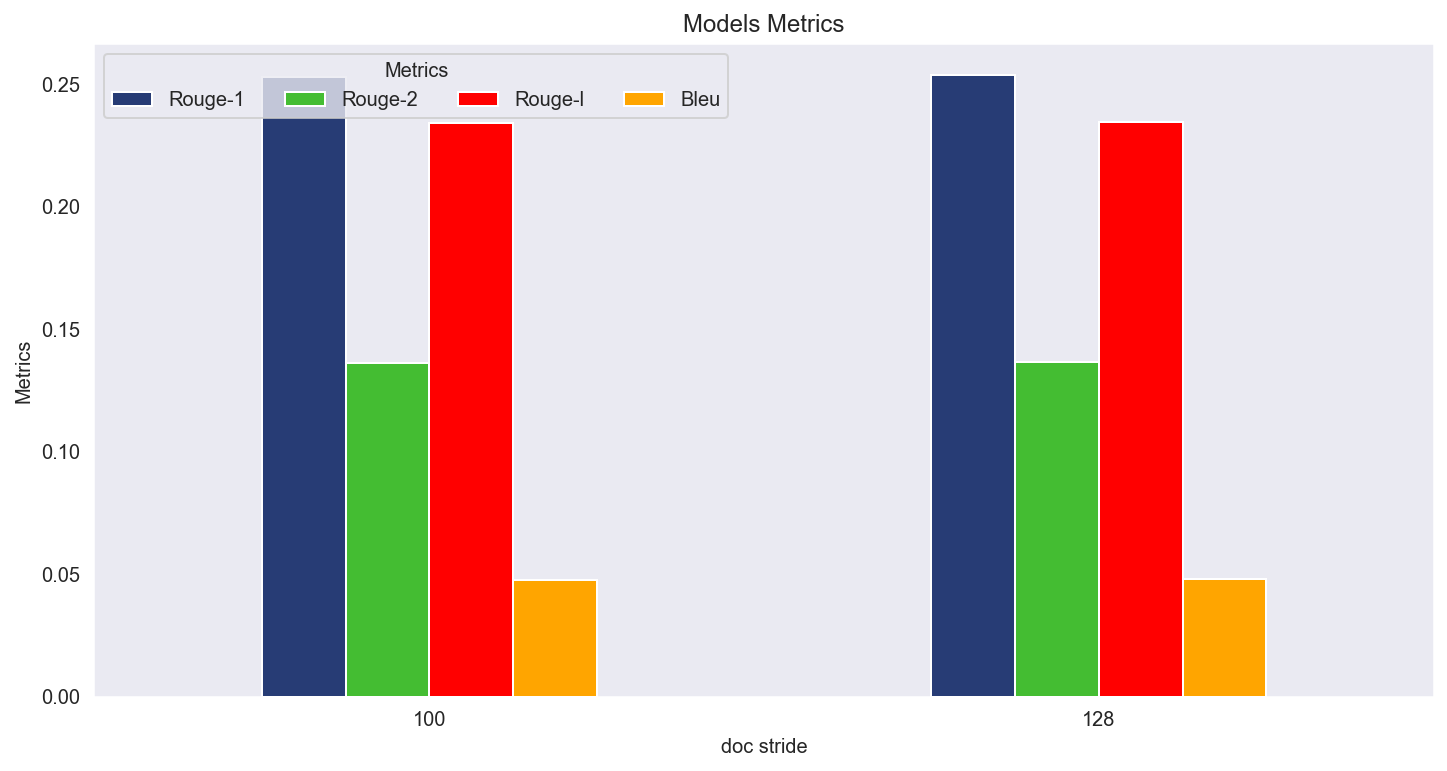

In [17]:
plt.rcParams["figure.figsize"] = [12, 6]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
stride_df[desired_columns[:-1]].plot(kind="bar", 
                                    color=['#273c75', '#44bd32', 'red', 'orange']).legend(loc='upper left', ncol=4, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Models Metrics")
plt.xlabel("doc stride")
plt.ylabel("Metrics")

Text(0, 0.5, 'time(s)')

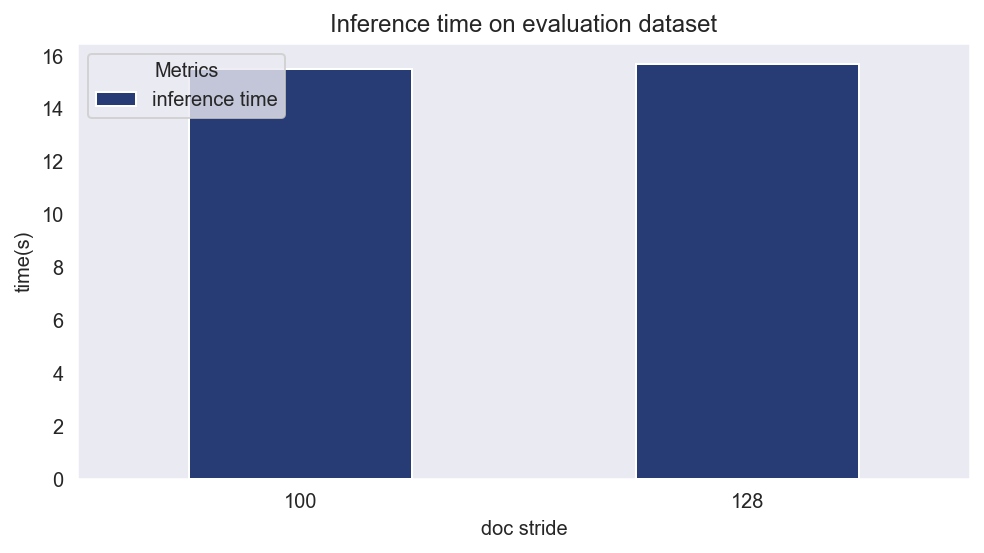

In [18]:
plt.rcParams["figure.figsize"] = [8, 4]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
stride_df[desired_columns[-1]].plot(kind="bar", 
                                    color=['#273c75']).legend(loc='upper left', ncol=1, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Inference time on evaluation dataset")
plt.xlabel("doc stride")
plt.ylabel("time(s)")

# Retriever top-k

In [19]:
retriever_tops = df['Retriever top-k'].unique()
desired_columns = ['Rouge-1', 'Rouge-2', 'Rouge-l', 'Bleu', 'Answers percent in retrieved documents', 'inference time', ]

metrics = []

for retriever_top in retriever_tops:
    metric_average = list(df[df['Retriever top-k'] == retriever_top][desired_columns].mean().T)
    metrics.append(metric_average)

retriever_df = pd.DataFrame(metrics, columns=desired_columns, index=retriever_tops)
retriever_df

,Rouge-1,Rouge-2,Rouge-l,Bleu,Answers percent in retrieved documents,inference time
3,0.254954,0.141097,0.237349,0.049131,0.102859,9.827833
5,0.255540,0.136875,0.235348,0.047899,0.124800,15.624712
7,0.249604,0.131084,0.230227,0.046339,0.132088,21.266579


Text(0, 0.5, 'Metrics')

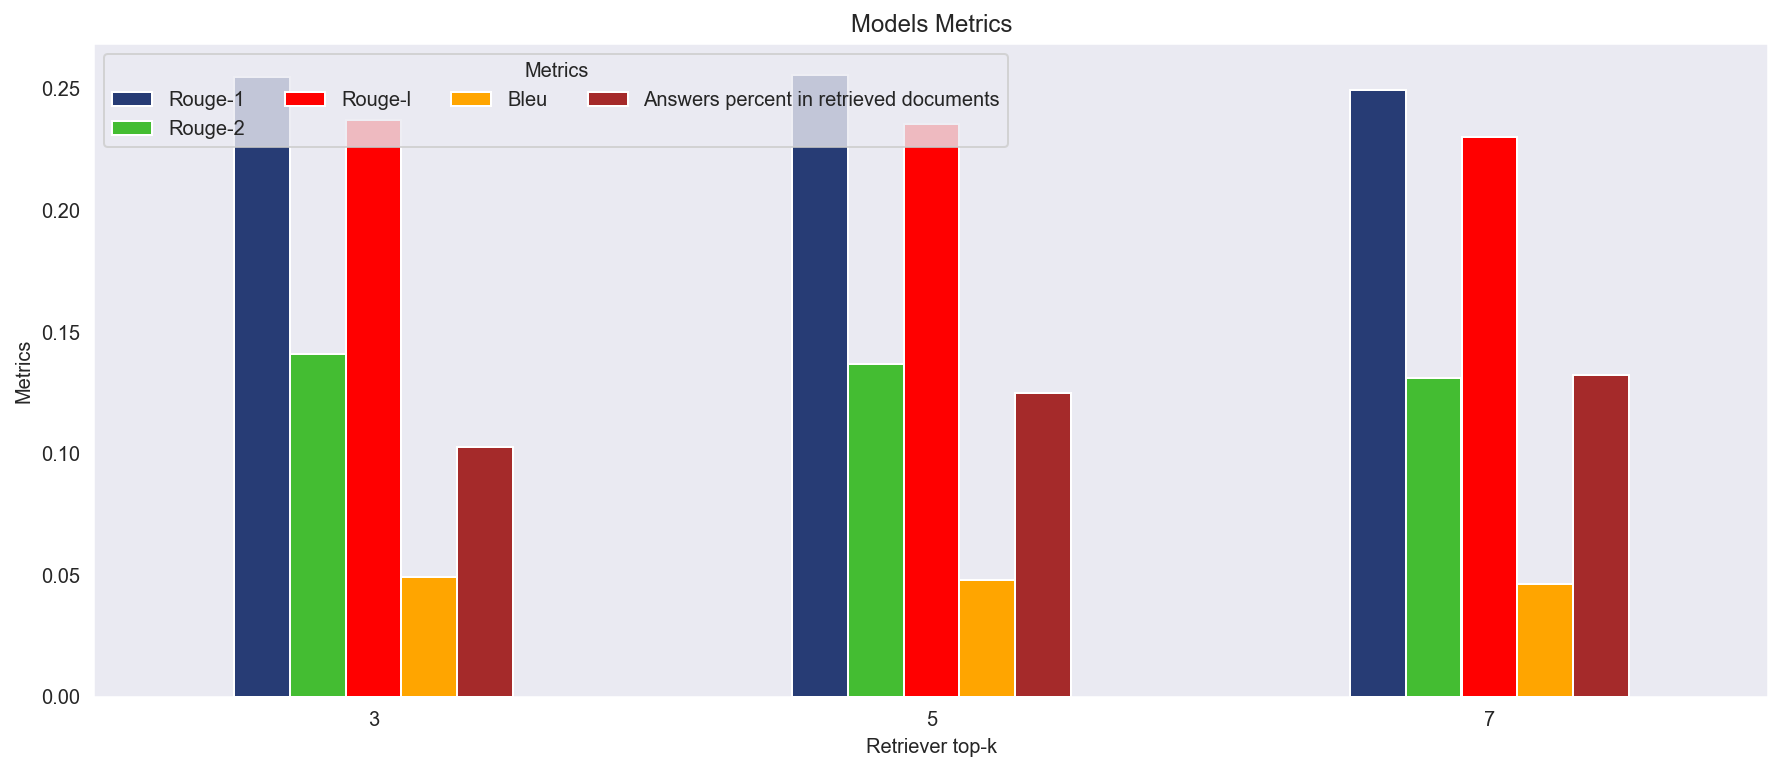

In [20]:
plt.rcParams["figure.figsize"] = [15, 6]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
retriever_df[desired_columns[:-1]].plot(kind="bar", 
                                    color=['#273c75', '#44bd32', 'red', 'orange', 'brown']).legend(loc='upper left', ncol=4, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Models Metrics")
plt.xlabel("Retriever top-k")
plt.ylabel("Metrics")

Text(0, 0.5, 'time(s)')

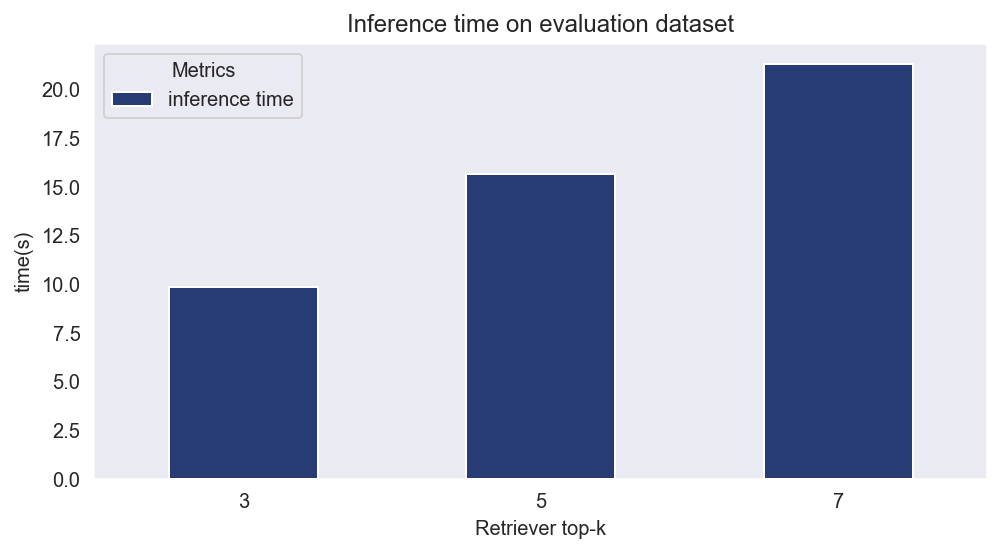

In [21]:
plt.rcParams["figure.figsize"] = [8, 4]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
retriever_df[desired_columns[-1]].plot(kind="bar", 
                                    color=['#273c75']).legend(loc='upper left', ncol=1, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Inference time on evaluation dataset")
plt.xlabel("Retriever top-k")
plt.ylabel("time(s)")

# QA top-k (Reader top-k)

In [22]:
reader_tops = df['QA top-k'].unique()
desired_columns = ['Rouge-1', 'Rouge-2', 'Rouge-l', 'Bleu', 'inference time']

metrics = []

for reader_top in reader_tops:
    metric_average = list(df[df['QA top-k'] == reader_top][desired_columns].mean().T)
    metrics.append(metric_average)

reader_df = pd.DataFrame(metrics, columns=desired_columns, index=reader_tops)
reader_df

,Rouge-1,Rouge-2,Rouge-l,Bleu,inference time
3,0.237482,0.125812,0.220128,0.058296,15.499495
5,0.261393,0.142761,0.241832,0.045403,15.566833
7,0.261223,0.140484,0.240963,0.039670,15.652797


Text(0, 0.5, 'Metrics')

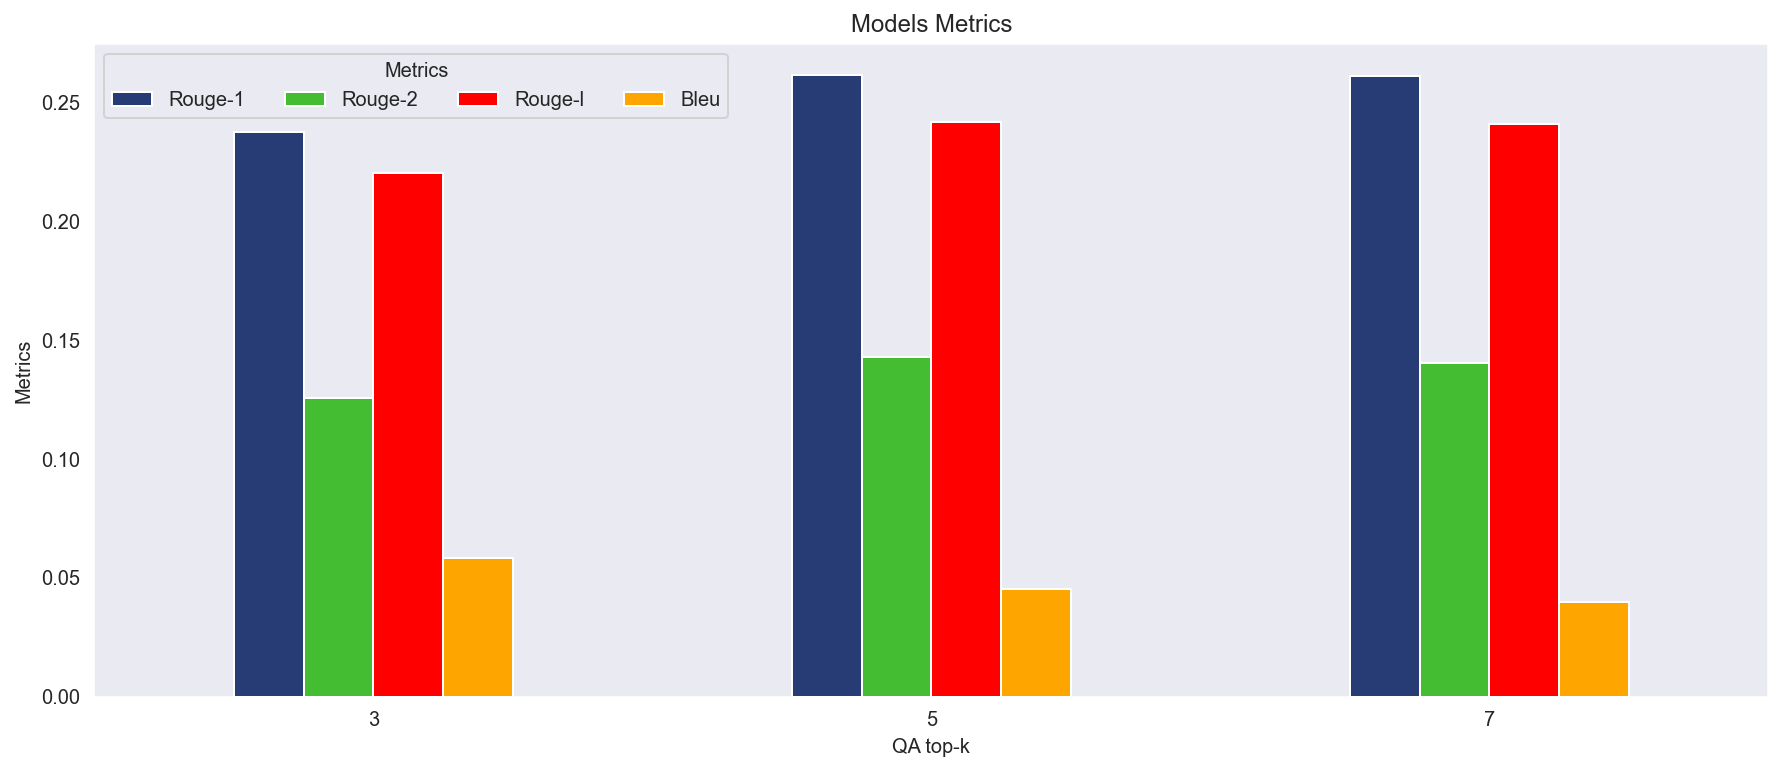

In [23]:
plt.rcParams["figure.figsize"] = [15, 6]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
reader_df[desired_columns[:-1]].plot(kind="bar", 
                                    color=['#273c75', '#44bd32', 'red', 'orange', 'brown']).legend(loc='upper left', ncol=4, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Models Metrics")
plt.xlabel("QA top-k")
plt.ylabel("Metrics")

Text(0, 0.5, 'time(s)')

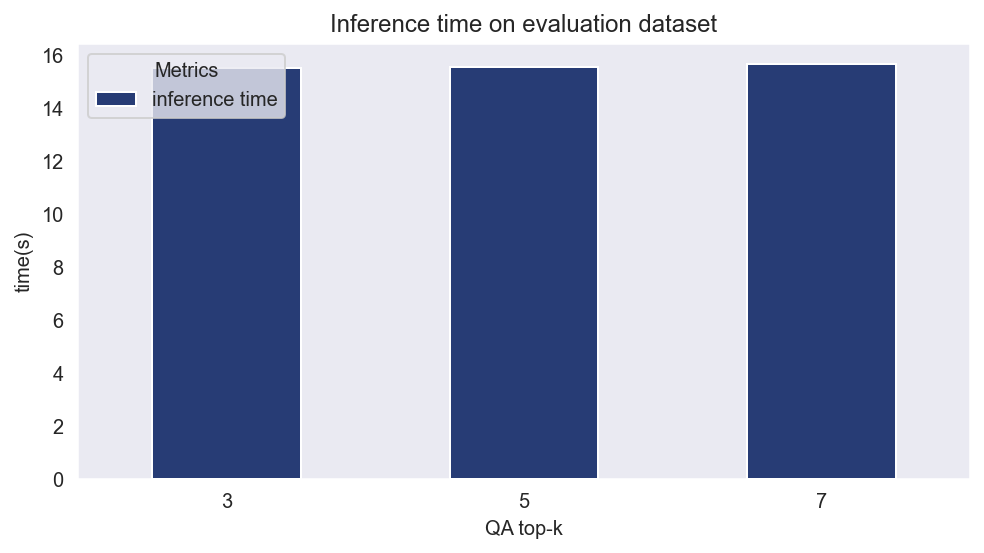

In [24]:
plt.rcParams["figure.figsize"] = [8, 4]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
reader_df[desired_columns[-1]].plot(kind="bar", 
                                    color=['#273c75']).legend(loc='upper left', ncol=1, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Inference time on evaluation dataset")
plt.xlabel("QA top-k")
plt.ylabel("time(s)")

# Dataset type

In [37]:
datasets = df['Dataset'].unique()
desired_columns = ['Rouge-1', 'Rouge-2', 'Rouge-l', 'Bleu', 'inference time']

metrics = []

for dataset in datasets:
    metric_average = list(df[df['Dataset'] == dataset][desired_columns].mean().T)
    metrics.append(metric_average)

dataset_df = pd.DataFrame(metrics, columns=desired_columns, index=[dataset.split('/')[-1] for dataset in df['Dataset'].unique()])
dataset_df

,Rouge-1,Rouge-2,Rouge-l,Bleu,inference time
titleText-threeSentences.csv,0.251405,0.137751,0.235900,0.052365,17.065838
titleText-paragraphs.csv,0.255328,0.134954,0.232715,0.043214,14.080245


Text(0, 0.5, 'Metrics')

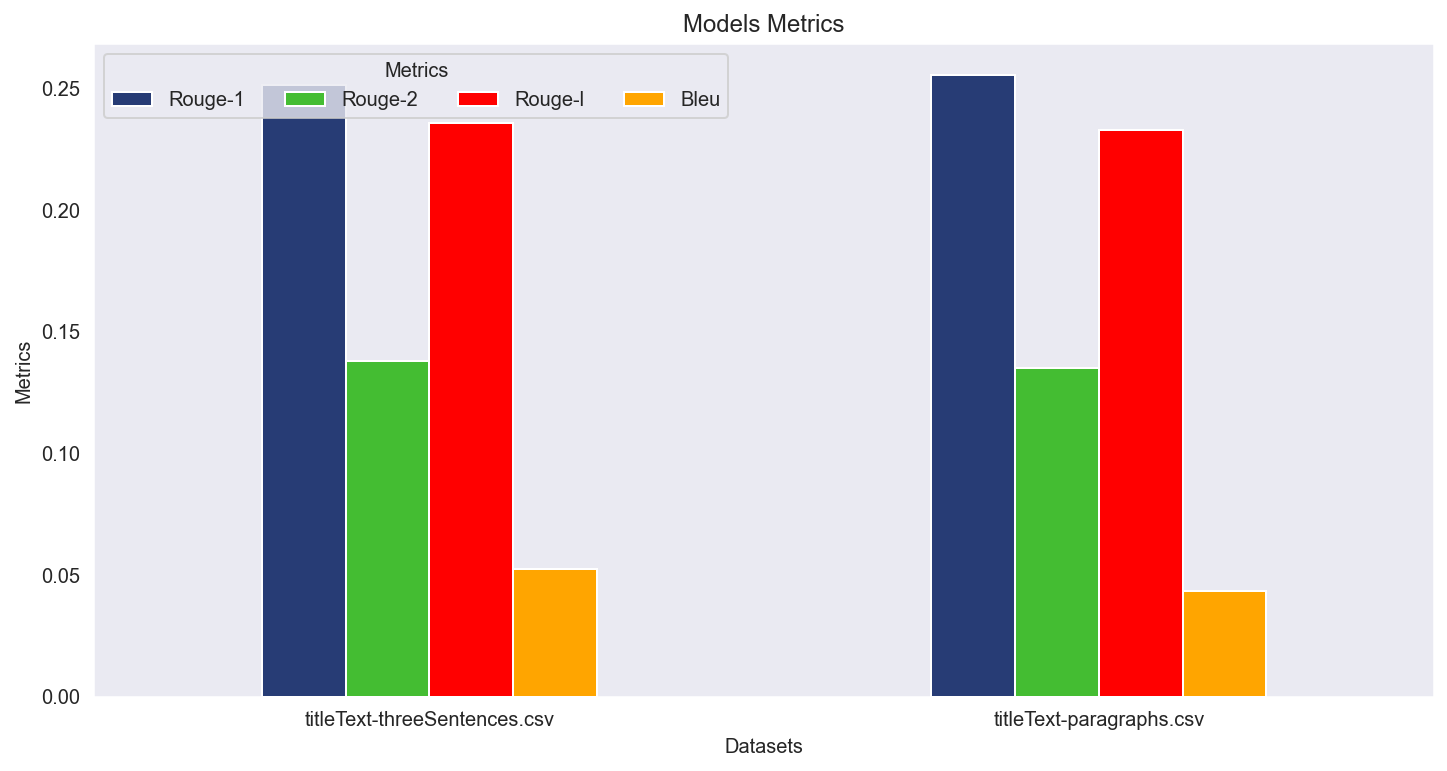

In [38]:
plt.rcParams["figure.figsize"] = [12, 6]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
dataset_df[desired_columns[:-1]].plot(kind="bar", 
                                    color=['#273c75', '#44bd32', 'red', 'orange']).legend(loc='upper left', ncol=4, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Models Metrics")
plt.xlabel("Datasets")
plt.ylabel("Metrics")

Text(0, 0.5, 'time(s)')

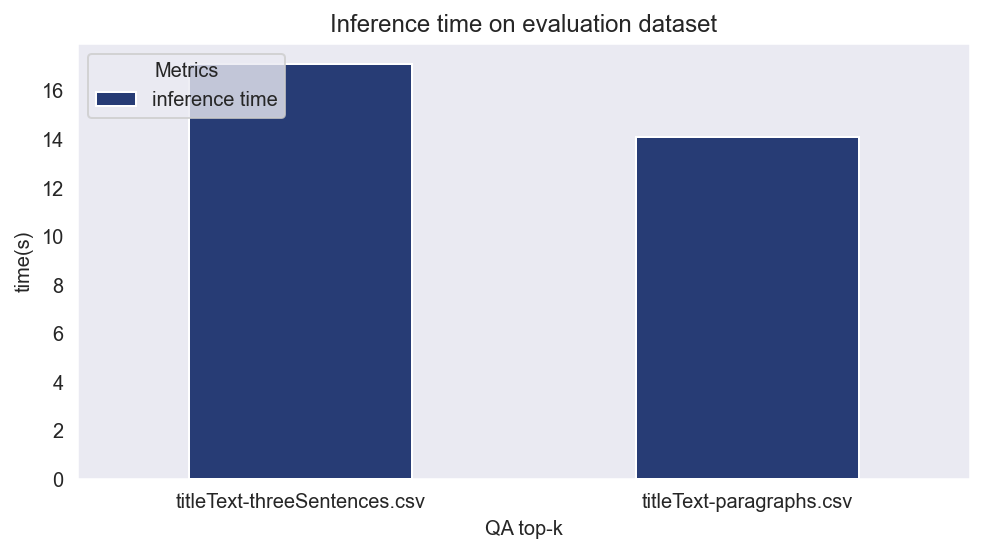

In [39]:
plt.rcParams["figure.figsize"] = [8, 4]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
dataset_df[desired_columns[-1]].plot(kind="bar", 
                                    color=['#273c75']).legend(loc='upper left', ncol=1, title="Metrics")

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Inference time on evaluation dataset")
plt.xlabel("QA top-k")
plt.ylabel("time(s)")

# Top models

## Best models according to rouge-1 value

In [25]:
df.sort_values('Rouge-1', ascending=False).head(5)

,Unnamed: 0,QA model,Dataset,embed_title,context_window_size,max_seq_len,doc_stride,max_seq_len_passage,max_seq_len_query,Retriever top-k,QA top-k,Rouge-1,Rouge-2,Rouge-l,Bleu,Answers percent in retrieved documents,VRAM,document embedding time,inference time
544,544,deepset/roberta-base-squad2,drive/MyDrive/titleText-paragraphs.csv,True,150,256,100,256,64,5,5,0.330565,0.206128,0.304874,0.050567,0.088235,0,783.301802,3.708495
562,562,deepset/roberta-base-squad2,drive/MyDrive/titleText-paragraphs.csv,True,175,256,100,256,64,5,5,0.330565,0.206128,0.304874,0.050567,0.088235,0,783.301802,3.719030
571,571,deepset/roberta-base-squad2,drive/MyDrive/titleText-paragraphs.csv,True,175,256,128,256,64,5,5,0.324132,0.193830,0.296752,0.049613,0.088235,0,783.301802,3.891217
553,553,deepset/roberta-base-squad2,drive/MyDrive/titleText-paragraphs.csv,True,150,256,128,256,64,5,5,0.324132,0.193830,0.296752,0.049613,0.088235,0,783.301802,3.880381
565,565,deepset/roberta-base-squad2,drive/MyDrive/titleText-paragraphs.csv,True,175,256,100,256,64,7,5,0.323503,0.191283,0.293234,0.047876,0.088235,0,783.301802,4.750461


## Best models according to rouge-2 value

In [26]:
df.sort_values('Rouge-2', ascending=False).head(5)

,Unnamed: 0,QA model,Dataset,embed_title,context_window_size,max_seq_len,doc_stride,max_seq_len_passage,max_seq_len_query,Retriever top-k,QA top-k,Rouge-1,Rouge-2,Rouge-l,Bleu,Answers percent in retrieved documents,VRAM,document embedding time,inference time
13,13,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,150,256,128,256,64,5,5,0.319277,0.215881,0.306076,0.050894,0.147059,0,584.795759,4.109282
4,4,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,150,256,100,256,64,5,5,0.319277,0.215881,0.306076,0.050894,0.147059,0,584.795759,4.027034
22,22,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,175,256,100,256,64,5,5,0.319277,0.215881,0.306076,0.050894,0.147059,0,584.795759,4.022983
31,31,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,175,256,128,256,64,5,5,0.319277,0.215881,0.306076,0.050894,0.147059,0,584.795759,4.092509
186,186,ahotrod/albert_xxlargev1_squad2_512,drive/MyDrive/titleText-threeSentences.csv,True,150,256,100,256,64,7,3,0.317661,0.214061,0.297506,0.070923,0.147059,0,584.795759,84.547077


## Best models according to rouge-l value

In [27]:
df.sort_values('Rouge-l', ascending=False).head(5)

,Unnamed: 0,QA model,Dataset,embed_title,context_window_size,max_seq_len,doc_stride,max_seq_len_passage,max_seq_len_query,Retriever top-k,QA top-k,Rouge-1,Rouge-2,Rouge-l,Bleu,Answers percent in retrieved documents,VRAM,document embedding time,inference time
13,13,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,150,256,128,256,64,5,5,0.319277,0.215881,0.306076,0.050894,0.147059,0,584.795759,4.109282
31,31,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,175,256,128,256,64,5,5,0.319277,0.215881,0.306076,0.050894,0.147059,0,584.795759,4.092509
22,22,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,175,256,100,256,64,5,5,0.319277,0.215881,0.306076,0.050894,0.147059,0,584.795759,4.022983
4,4,drive/MyDrive/bert_basefi_qafi,drive/MyDrive/titleText-threeSentences.csv,True,150,256,100,256,64,5,5,0.319277,0.215881,0.306076,0.050894,0.147059,0,584.795759,4.027034
562,562,deepset/roberta-base-squad2,drive/MyDrive/titleText-paragraphs.csv,True,175,256,100,256,64,5,5,0.330565,0.206128,0.304874,0.050567,0.088235,0,783.301802,3.719030


## Best models according to bleu value

In [28]:
df.sort_values('Bleu', ascending=False).head(5)

,Unnamed: 0,QA model,Dataset,embed_title,context_window_size,max_seq_len,doc_stride,max_seq_len_passage,max_seq_len_query,Retriever top-k,QA top-k,Rouge-1,Rouge-2,Rouge-l,Bleu,Answers percent in retrieved documents,VRAM,document embedding time,inference time
210,210,ahotrod/albert_xxlargev1_squad2_512,drive/MyDrive/titleText-threeSentences.csv,True,175,256,128,256,64,5,3,0.310932,0.209091,0.287224,0.086598,0.147059,0,584.795759,63.455884
201,201,ahotrod/albert_xxlargev1_squad2_512,drive/MyDrive/titleText-threeSentences.csv,True,175,256,100,256,64,5,3,0.310932,0.209091,0.287224,0.086598,0.147059,0,584.795759,62.837337
192,192,ahotrod/albert_xxlargev1_squad2_512,drive/MyDrive/titleText-threeSentences.csv,True,150,256,128,256,64,5,3,0.310932,0.209091,0.287224,0.086598,0.147059,0,584.795759,63.500222
183,183,ahotrod/albert_xxlargev1_squad2_512,drive/MyDrive/titleText-threeSentences.csv,True,150,256,100,256,64,5,3,0.310932,0.209091,0.287224,0.086598,0.147059,0,584.795759,62.512013
117,117,deepset/roberta-base-squad2,drive/MyDrive/titleText-threeSentences.csv,True,150,256,128,256,64,3,3,0.240070,0.121457,0.226463,0.082874,0.147059,0,584.795759,2.903897
